In [2]:
import leuvenmapmatching as lv
import snman
import networkx as nx
import geopandas as gpd
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching import visualization as mmviz
import shapely as shp

data_directory = 'C:/Users/lballo/polybox/Research/SNMan/SNMan Shared/data/'
crs=2056

source = gpd.read_file(data_directory + 'inputs/traffic_volumes/npvm_2017_filtered.gpkg').to_crs(crs)
target = gpd.read_file(data_directory + 'outputs/edges.gpkg').to_crs(crs)



C:\Users\lballo\AppData\Roaming\Python\Python39\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [3]:
source_test_path = source.query('FROMNODENO == 455924 & TONODENO == 456017').reset_index().iloc[0]['geometry']
print(source_test_path)

#G = nx.read_shp(path + 'target_network.gpkg')
G = nx.from_pandas_edgelist(target, source='u', target='v', edge_attr='geometry')
G = G.to_undirected()

for id, data in G.edges.items():
    u, v = id
    G.nodes[u]['geometry'] = shp.geometry.Point(data['geometry'].coords[0])
    G.nodes[v]['geometry'] = shp.geometry.Point(data['geometry'].coords[-1])


#snman.export_streetgraph(G, path + 'edges.gpkg', path + 'nodes.gpkg')

LINESTRING (2682047.0635151737 1251744.1870405737, 2682065.9825151935 1251726.5024405618)


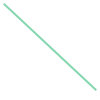

In [4]:
source_test_path

In [7]:
map_con = InMemMap("myosm", use_latlon=False, use_rtree=True, index_edges=True, crs_xy=2056)

# please note that lv works with lat, lon (reverse order)
for id, data in G.nodes.items():
    map_con.add_node(id, (data['geometry'].y, data['geometry'].x))
    #print((data['geometry'].y, data['geometry'].x))

for id, data in G.edges.items():
    map_con.add_edge(*id)
    map_con.add_edge(*id[::-1])

# reversed coords
path = [coords[::-1] for coords in list(source_test_path.coords)]

matcher = DistanceMatcher(map_con, max_dist=30, max_dist_init=30, max_lattice_width=5, non_emitting_states=True, only_edges=True)

states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

(1243737.6399961333, 2689316.491592412)
(1243693.199615505, 2689371.640261686)
(1243776.556475425, 2689284.2172421194)
(1243659.9077504596, 2689344.3035946228)
(1243763.2159790269, 2689347.1460779235)
(1243592.7652414758, 2689494.838041041)
(1243515.8996814634, 2689508.632694958)
(1243615.7869448147, 2689466.0396745247)
(1243533.5951579176, 2689418.037971495)
(1243566.0008609698, 2689198.671183707)
(1243542.984271533, 2689253.784721208)
(1243622.6416616824, 2689227.282328194)
(1243505.2746892255, 2689166.2890011994)
(1243606.4079294177, 2689150.0613459144)
(1243632.0762300126, 2689125.6048932867)
(1243634.4825167544, 2689027.4574166676)
(1243707.4363245154, 2689170.350167411)
(1243304.6747240324, 2689168.9939370444)
(1243363.680793572, 2689069.567565038)
(1243343.6978274304, 2689795.701562377)
(1243372.5955669542, 2689763.142697986)
(1243371.0765784485, 2689853.151255382)
(1243279.8949291508, 2689780.64233944)
(1243134.6842138052, 2689505.7311416375)
(1243112.718368828, 2689496.5080925

(<Figure size 2000x2232.96 with 1 Axes>, <Axes: xlabel='X', ylabel='Y'>)

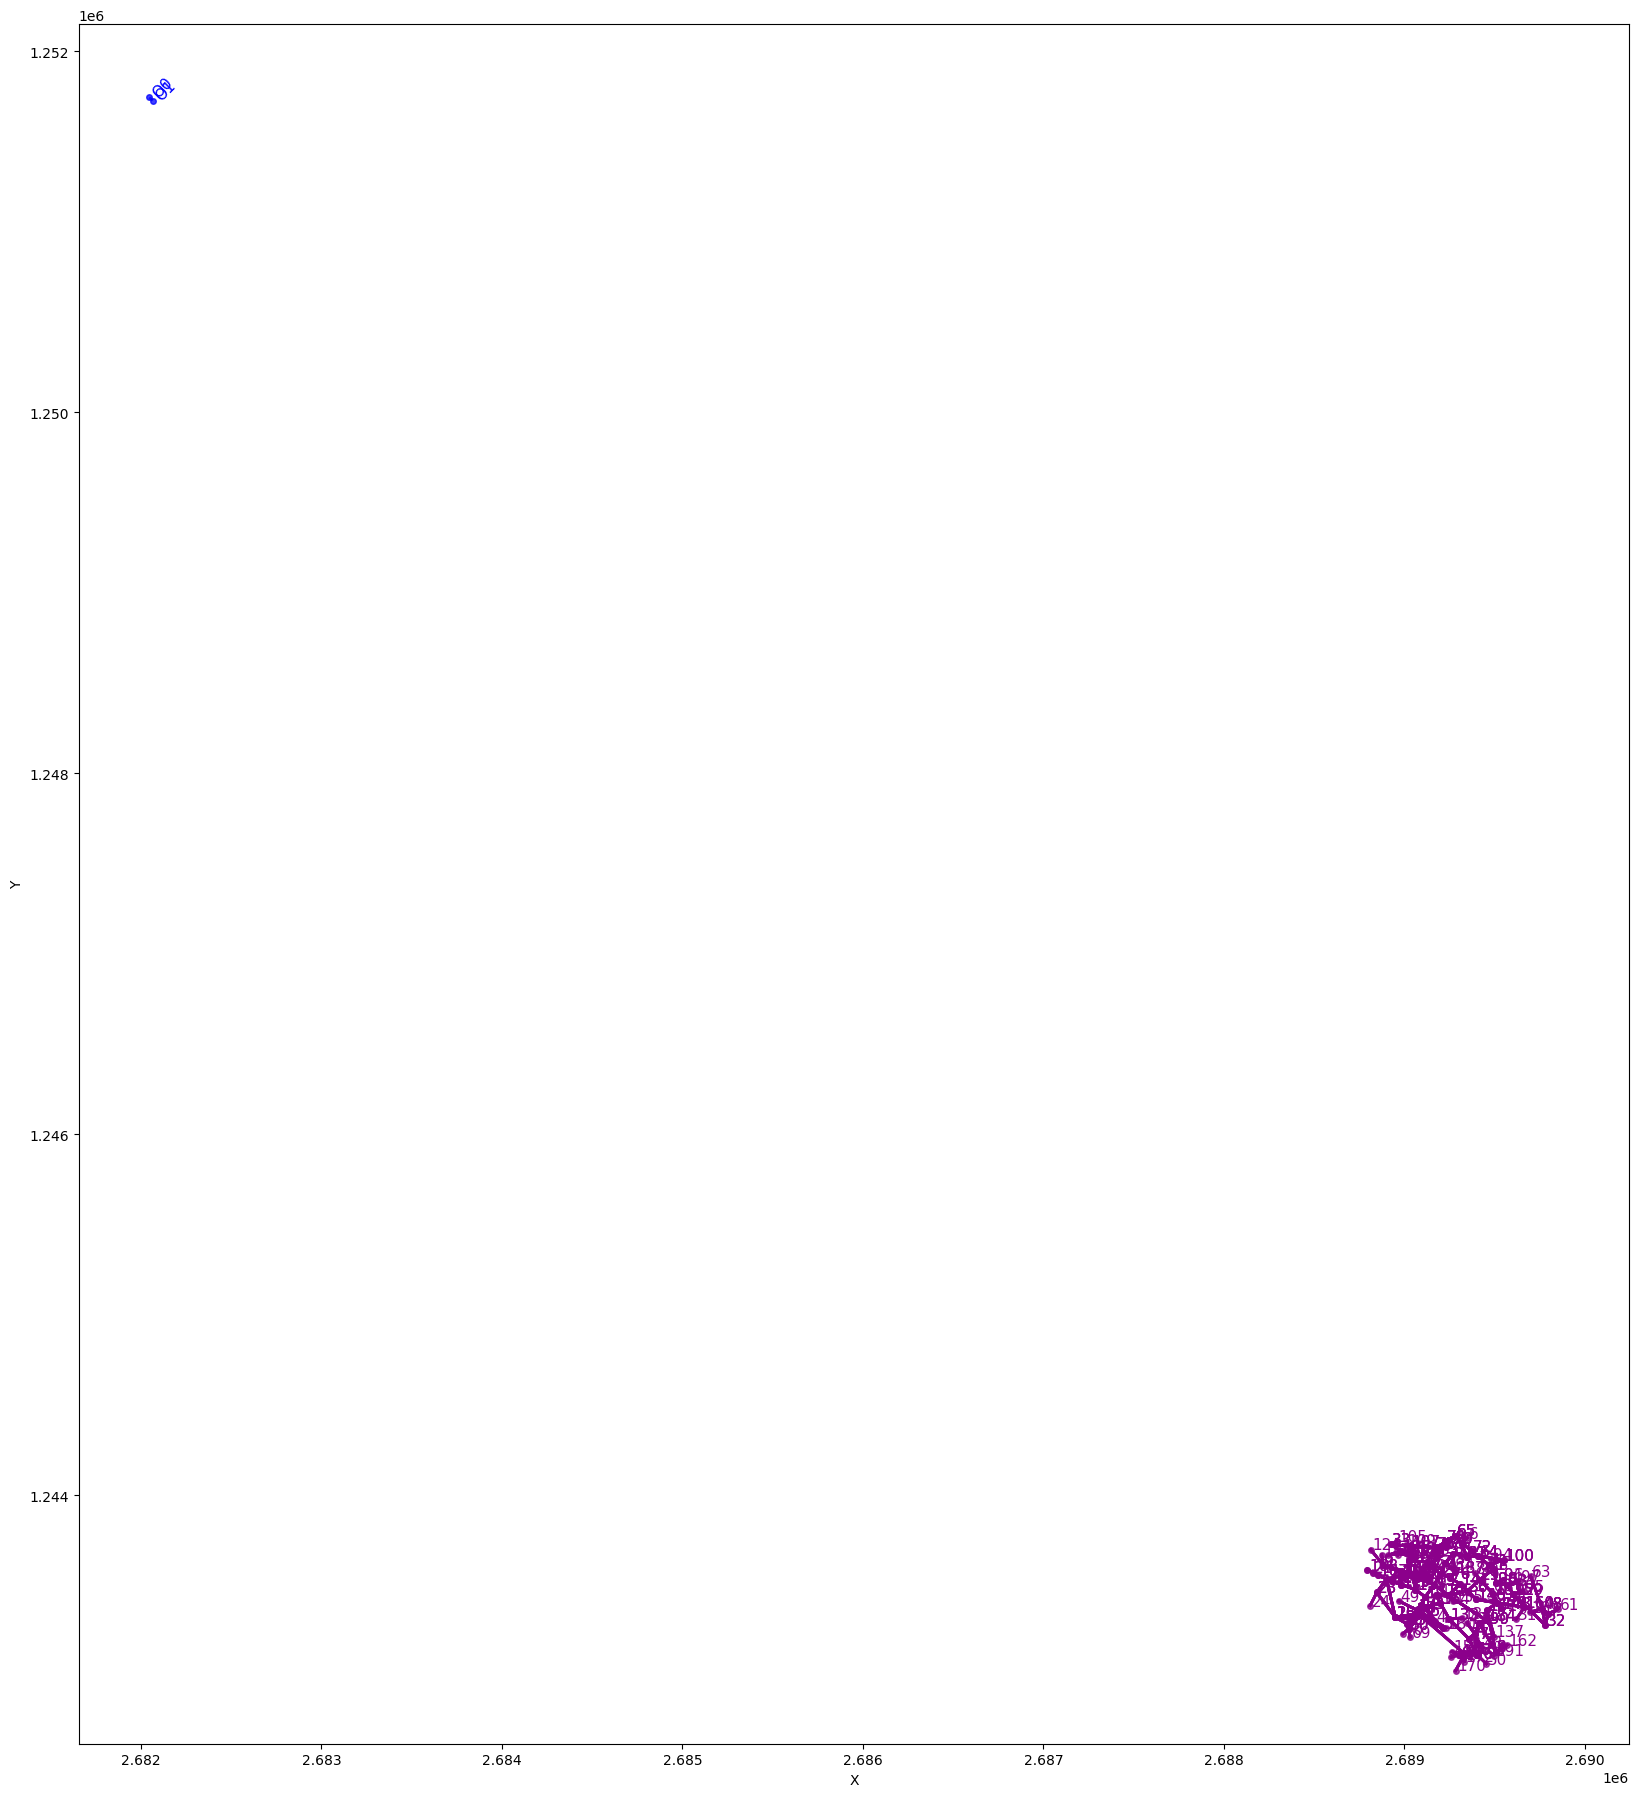

In [6]:
mmviz.plot_map(map_con, matcher=matcher,
               show_labels=True, show_matching=True, show_graph=True)